In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
Image_Size = 256
Batch_size = 32

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./dataset/PlantVillage",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

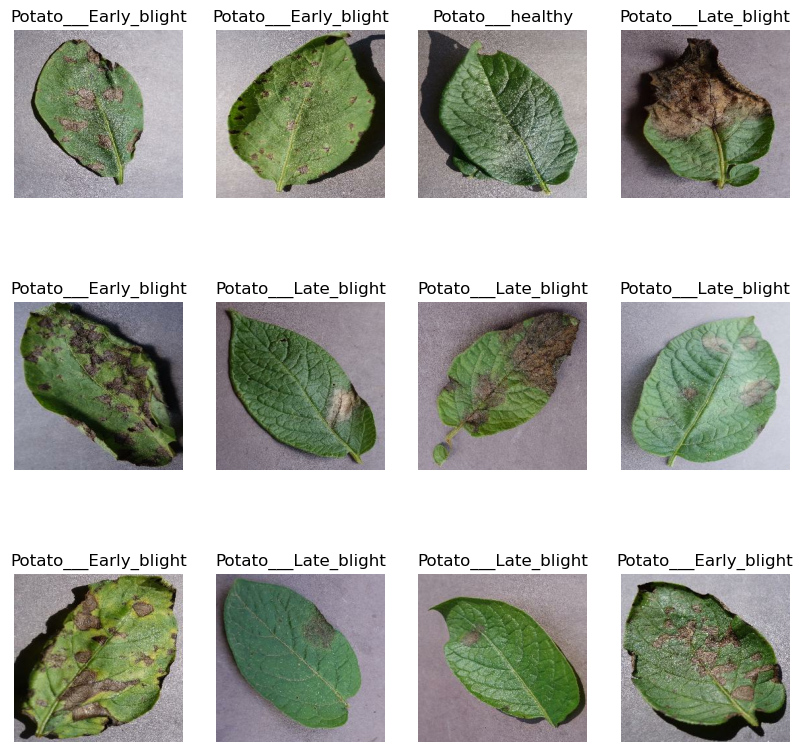

In [9]:
plt.figure(figsize=(10,10))
for image_batch,label in dataset.take(1).as_numpy_iterator():
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].astype('uint8'))
        plt.axis("off")
        plt.title(class_names[int(label[i])])

In [10]:
len(dataset)

68

In [11]:
train_size = len(dataset)*0.8
train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)

In [13]:
len(train_ds)

54

In [14]:
len(test_ds)

14

In [15]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [17]:
len(val_ds)

6

In [18]:
len(dataset) == len(val_ds) + len(train_ds) + len(test_ds)

True

In [19]:
import math

In [20]:
def get_data_Partitions(ds, train_split=0.8,test_split=0.1,val_split=0.1,shuffle = True, shuffle_size=10000):

    if shuffle == True:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = math.floor(len(ds)*train_split)
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_size = math.floor(len(ds)*val_split)
    val_ds = test_ds.take(val_size)
    test_ds = test_ds.skip(val_size)
    
    

    return train_ds, test_ds,val_ds

In [21]:
train_ds, test_ds,val_ds = get_data_Partitions(dataset)

In [22]:
len(dataset) == len(train_ds)+ len(test_ds)+len(val_ds)

True

In [23]:
len(train_ds)

54

In [24]:
len(test_ds)

8

In [25]:
len(val_ds)

6

In [26]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Batch_size,Image_Size,Image_Size,3),
    layers.Rescaling(1.0/255),
])

In [28]:
data_augmentation = resize_and_rescale = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
]) 

# CNN Model

In [29]:
input_shape = (Batch_size,Image_Size,Image_Size,3)
model = keras.Sequential(
    [
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'), 
]
)

C:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(train_ds,epochs=20,batch_size=Batch_size,verbose=1,validation_data=val_ds)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 435ms/step - accuracy: 0.7311 - loss: 0.6226 - val_accuracy: 0.8177 - val_loss: 0.3969
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 513ms/step - accuracy: 0.8178 - loss: 0.4308 - val_accuracy: 0.7656 - val_loss: 0.6190
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 464ms/step - accuracy: 0.8603 - loss: 0.3387 - val_accuracy: 0.8177 - val_loss: 0.5231
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 443ms/step - accuracy: 0.9099 - loss: 0.2151 - val_accuracy: 0.8333 - val_loss: 0.4226
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 446ms/step - accuracy: 0.8786 - loss: 0.2926 - val_accuracy: 0.8646 - val_loss: 0.3842
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 431ms/step - accuracy: 0.9374 - loss: 0.1706 - val_accuracy: 0.9427 - val_loss: 0.1784
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.9132 - loss: 0.2241 - val_accuracy: 0.9219 - val_loss: 0.1845
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step - accuracy: 0.9385 - loss: 0.1630 - val_accu

In [35]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9038 - loss: 0.2415


[0.2003180980682373, 0.92578125]

In [36]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

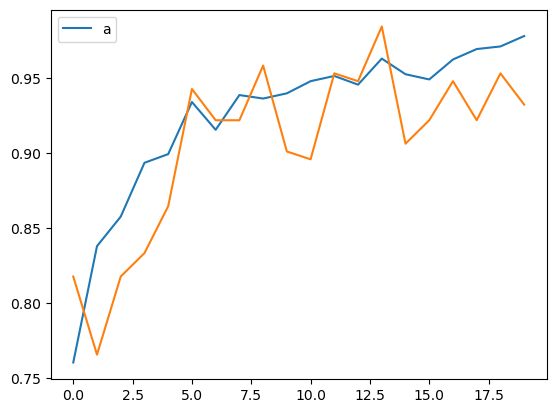

In [38]:
plt.plot(history.history['accuracy'])
plt.legend('accuracy')
plt.plot(history.history['val_accuracy'])
plt.show()

In [39]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


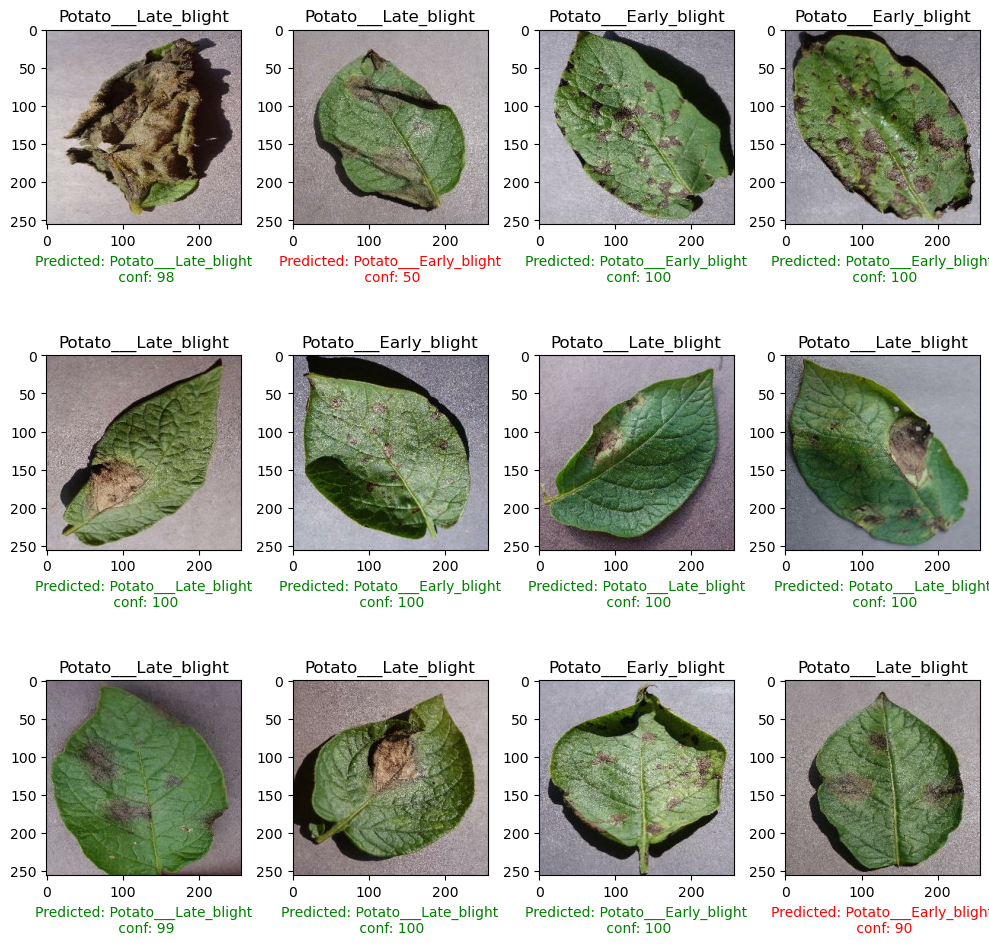

In [40]:
plt.figure(figsize=(10,10))
for image,label in test_ds.take(1).as_numpy_iterator():
    preds = model.predict(image)
    pred_classes = [np.argmax(i) for i in preds]
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(class_names[label[i]] )
        plt.imshow(image[i].astype('uint8'))
        if label[i]==pred_classes[i]:
            color = "Green"
        else:
            color = "Red"
            
        plt.xlabel("Predicted: "+class_names[pred_classes[i]]+"\n conf: "+str(round(100*np.max(preds[i]))), color=color)
    plt.tight_layout()



In [42]:
model_version = 3
model.save(f"../models/{model_version}.h5")

ValueError: Unable to synchronously create group (name already exists)

In [44]:
model1 = tf.keras.models.load_model("../models/1.h5")
model2 = tf.keras.models.load_model("../models/2.h5")
model3= tf.keras.models.load_model("../models/3.h5")

In [45]:
# Export to TensorFlow Serving format
tf.saved_model.save(model1, "models/1/")
tf.saved_model.save(model2, "models/2/")
tf.saved_model.save(model3, "models/3/")

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects